This notebook should document the investigation in merging different parts and about deriving merge heuristics.

In [2]:
import probability_calculator as pc
from fractions import Fraction
import matplotlib.pyplot as plt
import numpy as np

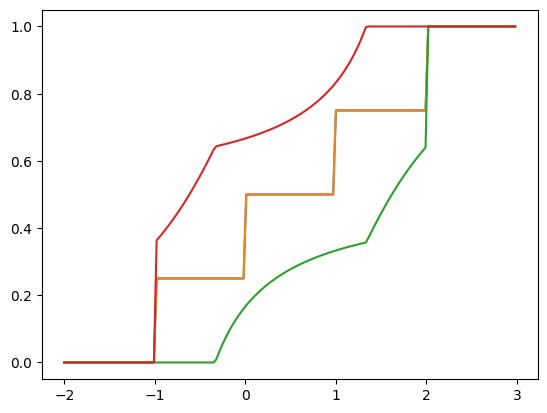

In [10]:
part1 = pc.part._Part(
    Fraction(1,2),
    Fraction(0),
    Fraction(2, 2),
    Fraction(-1),
    Fraction(1)
)

mean2 = Fraction(10, 10)
d2 = Fraction(1, 1)
part2 = pc.part._Part(
    Fraction(1,2),
    mean2,
    d2 + mean2**2,
    Fraction(-1, 1) + mean2,
    Fraction(1, 1) + mean2
)

parts = pc.part._Part.merge([part1, part2])

def plotData(part):
    ts = []
    l1 = []
    u1 = []

    t = Fraction(part1._min) - 1
    delta = (part2._max - part1._min) / 100
    while t <= part2._max + 1:
        (lower, upper) = part.partial_cdf(t)
    
        ts.append(float(t))
        l1.append(float(lower))
        u1.append(float(upper))

        t += delta

    return ts, l1, u1

ts1, l1, u1 = plotData(part1)
ts2, l2, u2 = plotData(part2)
tss, ls, us = plotData(parts)

plt.plot(ts1, np.array(l1) + np.array(l2))
plt.plot(ts1, np.array(u1) + np.array(u2))
plt.plot(tss, ls)
plt.plot(tss, us)

Idee: Integrale der Differenz als Fehlermaß

Integral obere von (Part1+Part2) - Integral obere von Part1 - Integral obere von Part2

Damit: Berechne das Integral eines Parts

In [3]:
# obere Schranke t_min bis bound1:
# sqrt(d)*p* (arctan((bound1-Ev)/sqrt(d)) - arctan((t_min-Ev)/sqrt(d)))

d = part1._square - part1._mean**2
dmaxmean = part1._max - part1._mean
bound1 = part1._mean - d / dmaxmean

sumintegral = 0.
if True:
    t = Fraction(part1._min)
    delta = (bound1 - part1._min) / 10000
    while t <= bound1:
        (lower, upper) = part1.partial_cdf(t)
        sumintegral += float(upper*delta)
        t += delta

fsqrtd = np.sqrt(float(d))
integral_u0 = float(part1._p) * fsqrtd * (np.arctan(-fsqrtd / float(part1._max - part1._mean)) - np.arctan(float(part1._min - part1._mean)/fsqrtd))

print(sumintegral, integral_u0)

0.12016299163254052 0.12015049158624415


In [4]:
# untere Schranke bound2 und t_max:
# siehe integral unten

d = part1._square - part1._mean**2
dmaxmean = part1._max - part1._mean
dmeanmin = part1._mean - part1._min
bound2 = part1._mean + d / dmeanmin

sumintegral = 0.
if True:
    t = Fraction(bound2)
    delta = (part1._max - bound2) / 10000
    while t <= part1._max:
        (lower, upper) = part1.partial_cdf(t)
        sumintegral += float(lower*delta)
        t += delta

fsqrtd = np.sqrt(float(d))
integral_l2 = float(part1._p) * float(part1._max - bound2) - float(part1._p) * fsqrtd * (np.arctan(-fsqrtd / float(dmeanmin)) - np.arctan(float(-dmaxmean)/fsqrtd))
print(sumintegral, integral_l2)

0.1298703417007927 0.12984950841375587


In [5]:
# obere Schranke zwischen bound1 und bound2:
# siehe integral unten
 
d = part1._square - part1._mean**2
dmaxmean = part1._max - part1._mean
dmeanmin = part1._mean - part1._min
dmaxmin = part1._max - part1._min
bound1 = part1._mean - d / dmaxmean
bound2 = part1._mean + d / dmeanmin
dupper = dmaxmean * dmeanmin

sumintegral = 0.
if True:
    t = bound1
    delta = (bound2 - bound1) / 10000
    while t <= bound2:
        (lower, upper) = part1.partial_cdf(t)
        sumintegral += float(upper*delta)
        t += delta


I = np.log(float((dupper + dmeanmin / dmaxmean * d)/(dupper - d)))
integral_u1 = float(part1._p) * (bound2 - bound1) - float(part1._p / dmaxmin) * (float(dmaxmin * d / dmaxmean) + I * float(d - dmaxmean * dmeanmin))

print(sumintegral, integral_u1)

0.3873682031205505 0.38732653608351375


In [6]:
# untere Schranke zwischen bound1 und bound2:
# siehe integral unten
 
d = part1._square - part1._mean**2
dmaxmean = part1._max - part1._mean
dmeanmin = part1._mean - part1._min
dmaxmin = part1._max - part1._min
bound1 = part1._mean - d / dmaxmean
bound2 = part1._mean + d / dmeanmin
dupper = dmaxmean * dmeanmin

sumintegral = 0.
if True:
    t = bound1
    delta = (bound2 - bound1) / 10000
    while t <= bound2:
        (lower, upper) = part1.partial_cdf(t)
        sumintegral += float(lower*delta)
        t += delta


I = np.log(float((dupper + dmaxmean / dmeanmin * d)/(dupper - d)))
integral_l1 = float(part1._p / dmaxmin) * (float(dmaxmin * d / dmeanmin) + I * float(d - dmaxmean * dmeanmin))

print(sumintegral, integral_l1)

0.11268179687944879 0.11267346391648628


In [7]:
# Differenz Schranke oben und unten zwischen bound1 und bound2:
# siehe integral unten
 
d = part1._square - part1._mean**2
dmaxmean = part1._max - part1._mean
dmeanmin = part1._mean - part1._min
dmaxmin = part1._max - part1._min
bound1 = part1._mean - d / dmaxmean
bound2 = part1._mean + d / dmeanmin
dupper = dmaxmean * dmeanmin

I = np.log(float((dupper**2 + d**2  + d * (dmaxmean**2 + dmeanmin**2))/(dupper - d)**2))
integral = float(part1._p / dmaxmin) * I * float(dupper - d)

print(integral_u1 - integral_l1, integral)

0.2746530721670275 0.27465307216702745


In [8]:
# Gesamtdifferenz

integral_u2 = float(part1._p) * float(dmaxmean - d / dmeanmin)

print(integral_u0 + integral_u1 + integral_u2 - integral_l1 - integral_l2, float(part1._p) * part1.cdf_uncertainty())

0.5149540553395158 0.5149540553395158
